In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd

from partner_selection import PartnerSelection
from CMPI_strategy import CMPI

In [3]:
q = pd.read_csv('./quadruples.csv').to_numpy()
quadruple = 2

df = pd.read_csv('./data/data.csv', parse_dates=True, index_col='Date').dropna()

In [4]:
df_training = df['2017-01-01':'2017-12-31'] #Taking 12 month data as mentioned in the paper
ps = PartnerSelection(df_training)

training_returns = ps.get_selected_pair_returns(q)[quadruple][1:].reset_index(drop=True)

In [5]:
df_testing = df['2018-01-01':'2018-12-31'] #Taking 12 month data as mentioned in the paper
ps = PartnerSelection(df_testing)

testing_returns = ps.get_selected_pair_returns(q)[quadruple][1:].reset_index(drop=True)

In [6]:
strat = CMPI()
strat.init_copula_model(training_returns)
strat.cvm.summary()

tree     edge | family      cop    par   par2 |   tau   utd   ltd 
----------------------------------------------------------------- 
   1      4,1 |      5        F  -8.90   0.00 | -0.63     -     -
          4,2 |     30   BB8_90  -2.18  -0.80 | -0.23     -     -
          4,3 |     10      BB8   5.32   0.79 |  0.55     -     -
   2    3,1;4 |    134  Tawn270  -1.83   0.45 | -0.26     -     -
        3,2;4 |    114  Tawn180   1.65   0.18 |  0.12     -  0.15
   3  2,1;3,4 |      5        F   4.63   0.00 |  0.43     -     -
---
type: C-vine    logLik: 358.1    AIC: -696.2    BIC: -660.98    
---
1 <-> AAP,   2 <-> GPC,   3 <-> PNR,   4 <-> DOV  tree    edge family     cop       par       par2        tau utd      ltd
1    1     4,3     10     BB8  5.318273  0.7947100  0.5542579   0 0.000000
2    1     4,2     30  BB8_90 -2.184717 -0.7958606 -0.2268593   0 0.000000
3    1     4,1      5       F -8.904736  0.0000000 -0.6334461   0 0.000000
4    2   3,2;4    114 Tawn180  1.653772  0.183105

In [7]:
cmpi = strat.generate_trading_signals(testing_returns)

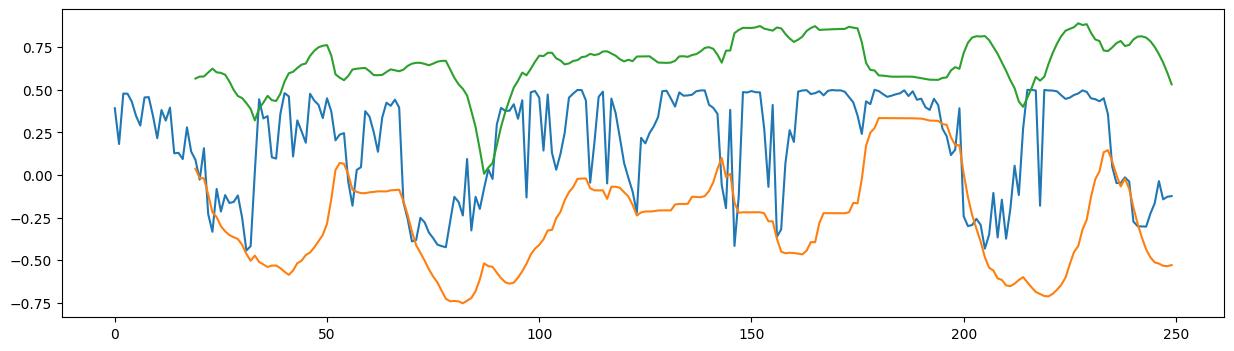

In [15]:
import matplotlib.pyplot as plt
lower_band = strat.calculate_bollinger_bands(cmpi, 20, -2)
upper_band = strat.calculate_bollinger_bands(cmpi, 20, 2)

f = plt.figure()
f.set_figheight(4)
f.set_figwidth(15)
plt.plot(cmpi)
plt.plot(lower_band)
plt.plot(upper_band)
plt.show()

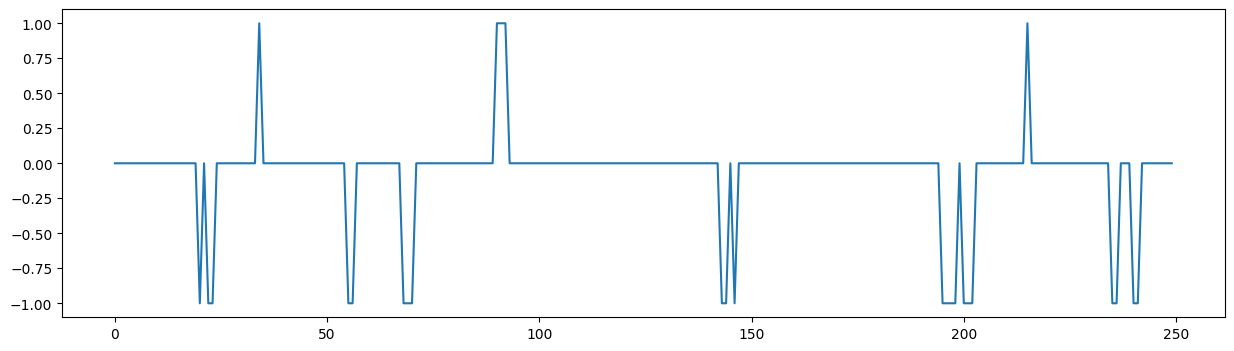

In [21]:
import numpy as np

lower = lower_band.values
upper = upper_band.values

signal = cmpi.values

position = np.zeros(len(signal))
for i in range(len(signal)):
    if signal[i] < lower[i]:
        if position[i] == 0:
            position[i] = -1
        elif position[i] == 1:
            position[i] = 0
    elif signal[i] > upper[i]:
        if position[i] == 0:
            position[i] = 1
        elif position[i] == -1:
            position[i] = 0

f = plt.figure()
f.set_figheight(4)
f.set_figwidth(15)
plt.plot(position)